In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!pip install quandl
import quandl

  Using cached requests-2.31.0-py3-none-any.whl.metadata (4.6 kB)
  Using cached charset_normalizer-3.3.2-cp311-cp311-win_amd64.whl.metadata (34 kB)
  Using cached urllib3-2.1.0-py3-none-any.whl.metadata (6.4 kB)
  Using cached certifi-2023.11.17-py3-none-any.whl.metadata (2.2 kB)
Using cached requests-2.31.0-py3-none-any.whl (62 kB)
   ---------------------------------------- 0.0/55.8 kB ? eta -:--:--
   ---------------------------------------- 55.8/55.8 kB ? eta 0:00:00
Using cached certifi-2023.11.17-py3-none-any.whl (162 kB)
Using cached charset_normalizer-3.3.2-cp311-cp311-win_amd64.whl (99 kB)
Using cached urllib3-2.1.0-py3-none-any.whl (104 kB)


In [10]:
data=pd.read_csv("AAPL.csv")

In [11]:
col_ind=data.iloc[:,0]

In [12]:
data.head()

Unnamed: 0 symbol                       date    close     high     low  \
0           0   AAPL  2015-05-27 00:00:00+00:00  132.045  132.260  130.05   
1           1   AAPL  2015-05-28 00:00:00+00:00  131.780  131.950  131.10   
2           2   AAPL  2015-05-29 00:00:00+00:00  130.280  131.450  129.90   
3           3   AAPL  2015-06-01 00:00:00+00:00  130.535  131.390  130.05   
4           4   AAPL  2015-06-02 00:00:00+00:00  129.960  130.655  129.32   

     open    volume    adjClose     adjHigh      adjLow     adjOpen  \
0  130.34  45833246  121.682558  121.880685  119.844118  120.111360   
1  131.86  30733309  121.438354  121.595013  120.811718  121.512076   
2  131.23  50884452  120.056069  121.134251  119.705890  120.931516   
3  131.20  32112797  120.291057  121.078960  119.844118  120.903870   
4  129.86  33667627  119.761181  120.401640  119.171406  119.669029   

   adjVolume  divCash  splitFactor  
0   45833246      0.0          1.0  
1   30733309      0.0          1.0  
2   50884452      0.0          1.0  
3   32112797      0.0          1.0  
4   33667627      0.0          1.0

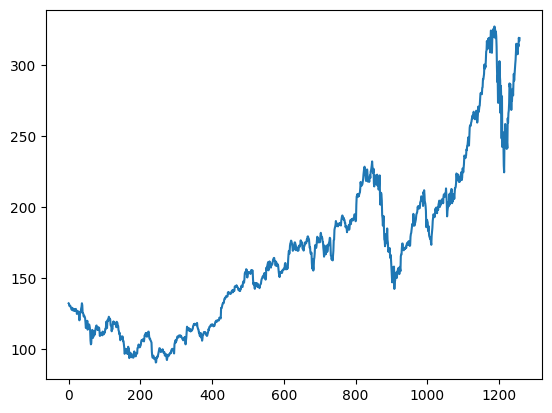

In [13]:
plt.plot(data["close"],label="Closing_price")

In [26]:
data["Open - close"]=round((data["open"]-data["close"]),2)
data["high - low"]=round((data["high"]-data["low"]),2)
data=data.dropna()

In [27]:
x=data[["Open - close","high - low"]]

In [28]:
x

Open - close  high - low
0            -1.70        2.21
1             0.08        0.85
2             0.95        1.55
3             0.66        1.34
4            -0.10        1.34
...            ...         ...
1253         -1.79        6.18
1254          1.89        5.51
1255         -2.55        3.32
1256          1.81        5.02
1257         -3.12        3.88

[1258 rows x 2 columns]

## Classification
###### Input Features to predict whethere the customer should buy or sell

In [29]:
data["close"]

0       132.045
1       131.780
2       130.280
3       130.535
4       129.960
         ...   
1253    314.960
1254    313.140
1255    319.230
1256    316.850
1257    318.890
Name: close, Length: 1258, dtype: float64

In [30]:
y=np.where(data["close"].shift(-1)>data["close"],1,-1)
y

array([-1, -1,  1, ..., -1,  1, -1])

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)


In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

In [48]:
knn=KNeighborsClassifier(n_neighbors=8,weights="uniform",algorithm="auto",p=2)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy_knn}')

Accuracy: 0.5142857142857142


In [35]:
model_params={
    "svm":{
        "model":svm.SVC(gamma="auto",probability=True),
        "params":{
            "svc__C":[1,10,100,1000],
            "svc__kernel":["linear","rbf"]
        }
    },
    "random_forest":{
        "model":RandomForestClassifier(),
        "params":{
            "randomforestclassifier__n_estimators":[1,5,10]
        }
    },
    "logistic_regression":{
        "model":LogisticRegression(solver="liblinear",multi_class="auto"),
        "params":{
            "logisticregression__C":[1,5,10]
        }
    }
}


In [37]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [38]:
scores=[]
best={}
import pandas as pd
for algo,mp in model_params.items():
    pipe=make_pipeline(StandardScaler(),mp["model"])
    clf=GridSearchCV(pipe,mp["params"],cv=5,return_train_score=False)
    clf.fit(x_train,y_train)
    scores.append({"model":algo,
                   "best_score":clf.best_score_,
                  "best_params":clf.best_params_})
    best[algo]=clf.best_estimator_
df=pd.DataFrame(scores,columns=["model","best_score","best_params"])
df

model  best_score  \
0                  svm    0.531301   
1        random_forest    0.532388   
2  logistic_regression    0.550366   

                                   best_params  
0       {'svc__C': 1, 'svc__kernel': 'linear'}  
1  {'randomforestclassifier__n_estimators': 1}  
2                 {'logisticregression__C': 1}

# Regression Problem


In [53]:
y1=data["close"]
x_train_reg,x_test_reg,y_train_reg,y_test_reg=train_test_split(x,y1,random_state=44)
params={"n_neighbors":[2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
knn_reg=neighbors.KNeighborsRegressor()
model_reg=GridSearchCV(knn_reg,params,cv=5)

model_reg.fit(x_train_reg,y_train_reg)
pred=model_reg.predict(x_test)
pred[:5]

array([129.96      , 137.55266667, 190.58033333, 163.22266667,
       129.79333333])

In [56]:
data.head()

Unnamed: 0 symbol                       date    close     high     low  \
0           0   AAPL  2015-05-27 00:00:00+00:00  132.045  132.260  130.05   
1           1   AAPL  2015-05-28 00:00:00+00:00  131.780  131.950  131.10   
2           2   AAPL  2015-05-29 00:00:00+00:00  130.280  131.450  129.90   
3           3   AAPL  2015-06-01 00:00:00+00:00  130.535  131.390  130.05   
4           4   AAPL  2015-06-02 00:00:00+00:00  129.960  130.655  129.32   

     open    volume    adjClose     adjHigh      adjLow     adjOpen  \
0  130.34  45833246  121.682558  121.880685  119.844118  120.111360   
1  131.86  30733309  121.438354  121.595013  120.811718  121.512076   
2  131.23  50884452  120.056069  121.134251  119.705890  120.931516   
3  131.20  32112797  120.291057  121.078960  119.844118  120.903870   
4  129.86  33667627  119.761181  120.401640  119.171406  119.669029   

   adjVolume  divCash  splitFactor  Open - close  high - low  
0   45833246      0.0          1.0         -1.70        2.21  
1   30733309      0.0          1.0          0.08        0.85  
2   50884452      0.0          1.0          0.95        1.55  
3   32112797      0.0          1.0          0.66        1.34  
4   33667627      0.0          1.0         -0.10        1.34

In [65]:
x=data.iloc[:,1].values

In [66]:
x

array(['AAPL', 'AAPL', 'AAPL', ..., 'AAPL', 'AAPL', 'AAPL'], dtype=object)